# ImageNode
The ImageNode class in Geomapi represents the data and metadata of image data. The data itself and methods build upon Open3D and OpenCV concepts while the metadata builds upon the RDFlib framework:

[https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html)

[https://rdflib.readthedocs.io/](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html)

The code below shows how to create a ImageNode from various inputs. 

In [28]:
#IMPORT PACKAGES
from rdflib import Graph, URIRef, Literal, RDF
import open3d as o3d
import os
from pathlib import Path
import cv2
from PIL import Image
import matplotlib.pyplot as plt


#IMPORT MODULES
from context import geomapi 
from geomapi.nodes import *
import geomapi.utils as ut
from geomapi.utils import geometryutils as gmu
import geomapi.tools as tl

In [58]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
%autoreload 2

## ImageNode from properties

A placeholder ImageNode can be initialised without any data or metadata.

In [5]:
node=ImageNode(subject='myNode',
                    name='myName')
{key:value for key, value in node.__dict__.items() if not key.startswith('__') and not callable(key)}              

{'_xmlPath': None,
 '_xmpPath': None,
 'imageWidth': None,
 'imageHeight': None,
 'focalLength35mm': None,
 '_subject': rdflib.term.URIRef('file:///myNode'),
 '_graph': None,
 '_graphPath': None,
 '_path': None,
 '_name': 'myName',
 '_timestamp': None,
 '_resource': None,
 '_cartesianTransform': None}

## ImageNode from Path

Instead, it is much more likely to initialise a ImageNode from a path containing an image file. This sets the: <br>
1. subject
2. name
3. timestamp
4. path


In [6]:
filePath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','DJI_0067.JPG')
node=ImageNode(path=filePath)
{key:value for key, value in node.__dict__.items() if not key.startswith('__') and not callable(key)}              

{'_xmlPath': None,
 '_xmpPath': None,
 'imageWidth': 5472,
 'imageHeight': 3078,
 'focalLength35mm': None,
 '_subject': rdflib.term.URIRef('file:///DJI_0067'),
 '_graph': None,
 '_graphPath': None,
 '_path': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\IMG\\DJI_0067.JPG',
 '_name': 'DJI_0067',
 '_timestamp': '2018-06-06T15:21:17',
 '_resource': None,
 '_cartesianTransform': None,
 'resolutionUnit': 2,
 'geospatialTransform': [51.05982777777778, 3.7198242777777777, 1.814],
 'coordinateSystem': 'geospatial-wgs84'}

Additionally, any relevant properties from the EXIF data will be stored such as the geospatial transform. 

## ImageNode from Structure-from-Motion pipelines

As GEOMAPI is a geomatics API, the cartesianTransform of nodes is crucial to many of its functionality. For images, this is generally derived from Structure-from-Motion (SfM) pipelines. These pipelines allign the images in a common coordinate system of which the geospatial components are stored in software specific formats.

<br>

GEOMAPI currently supports two formats. [Agisoft Metashape](https://www.agisoft.com/) and [Capturing Reality](https://www.capturingreality.com/).

### Capturing Reality
To import the pose of an image from the Capturing Reality pipeline, one should export the coordinate information of the image to an [XMP](https://support.capturingreality.com/hc/en-us/articles/360012410660-Coordinate-System-Preservation-with-XMPs-Full-body-Scans) file. These files are xml formatted and stored per image.

![rendering](../../pics/capturingreality1.PNG)

In [7]:
xmpPath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','IMG_2173.xmp')
node=ImageNode(xmpPath=xmpPath)
{key:value for key, value in node.__dict__.items() if not key.startswith('__') and not callable(key)}              

{'_xmlPath': None,
 '_xmpPath': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\IMG\\IMG_2173.xmp',
 'imageWidth': 5616,
 'imageHeight': 3744,
 'focalLength35mm': 24.3771542355288,
 '_subject': rdflib.term.URIRef('file:///IMG_2173'),
 '_graph': None,
 '_graphPath': None,
 '_path': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\IMG\\IMG_2173.JPG',
 '_name': 'IMG_2173',
 '_timestamp': '2022-03-13T13:55:26',
 '_resource': None,
 '_cartesianTransform': array([[-0.05442451,  0.08978218,  0.99447329, -8.94782375],
        [-0.78368672, -0.62101649,  0.01317728, 11.25314019],
        [ 0.6187674 , -0.77863835,  0.10415962,  6.54284524],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'coordinateSystem': 'geospatial-wgs84',
 'principalPointU': -0.00291855667677505,
 'principalPointV': -0.00415035446181888,
 'distortionCoeficients': [-0.126115439984335,
  0.0981832072267781,
  0.0312044509604729,
  0.0,
  0.0,
  0.0],
 'resolutionUnit': 2,
 'geospatialTransform':

which yields cartesianTransform and some internal camera parameters such as the focalLength35mm, which is needed for digital renders. 

### Agisoft Metashape
Alternatively, Metashape exports its camera poses and properties in a common [XML file ](https://www.agisoft.com/forum/index.php?topic=6211.0). Therefore, one should provide both the subject in the form of the camera label, and the XML file.

In [8]:
xmlPath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','ReferenceLAMBERT08_TAW.xml')
node=ImageNode(subject='101_0366_0037',xmlPath=xmlPath)
{key:value for key, value in node.__dict__.items() if not key.startswith('__') and not callable(key)}  

{'_xmlPath': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\IMG\\ReferenceLAMBERT08_TAW.xml',
 '_xmpPath': None,
 'imageWidth': 5472,
 'imageHeight': 3648,
 'focalLength35mm': None,
 '_subject': rdflib.term.URIRef('file:///101_0366_0037'),
 '_graph': None,
 '_graphPath': None,
 '_path': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\IMG\\101_0366_0037.jpg',
 '_name': '101_0366_0037',
 '_timestamp': '2021-06-07T16:49:33',
 '_resource': None,
 '_cartesianTransform': array([[-9.02585284e-01, -4.30511097e-01,  0.00000000e+00,
          6.00578072e+05],
        [ 4.30511097e-01, -9.02585284e-01,  0.00000000e+00,
          6.96277256e+05],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          3.13904134e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 'sxy': 0.02,
 'sz': 0.05,
 'resolutionUnit': 2,
 'geospatialTransform': [51.074569000007855,
  3.6636115834699305,
  74.1250002610359],
 'coordinateSystem': 'geospat

which also yields the accuracies of the SfM pose estimation.

![rendering](../../pics/Georeferencedoutput.png)

## ImageNode with getResource

Given the above XMP or XML files, all metadata of the node can be set. However, one can call getResource to also load the image.

**NOTE**: GetResource is optional and might slow down any analysis. Only work with data when all metadata options have been exhausted.

In [18]:
xmpPath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','IMG_7257.xmp')
node=ImageNode(xmpPath=xmpPath, getResource=True)
print(type(node.resource))

<class 'numpy.ndarray'>


![rendering](../../pics/IMG_7257.JPG)

## ImageNode from resource

A similar result is achieved by initialising a ImageNode from a PIL, Open3D or nd.array(OPENCV) instance. In this case, GetResource (bool) means nothing. 

OpenCV images are stored as np.ndarrays 

In [11]:
filePath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','IMG_202200706_00___70_.png')
img=cv2.imread(filePath)          
node=ImageNode(resource=img)
print(type(node.resource))

<class 'numpy.ndarray'>


PIL images are a seperate class but are transferred to np.ndarrays

In [14]:
filePath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','IMG_202200706_00___70_.png')
img=Image.open( filePath)   
node=ImageNode(resource=img)
print(type(node.resource))

<class 'numpy.ndarray'>


Finally, Open3D also has a seperate class but also uses np.ndarrays to buffer the data

In [16]:
filePath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','IMG_202200706_00___70_.png')
img=o3d.io.read_image( filePath)   
print(img)
node=ImageNode(resource=img)
print(type(node.resource))

Image of size 5472x3078, with 3 channels.
Use numpy.asarray to access buffer data.
<class 'numpy.ndarray'>


## ImageNode from Graph and graphPath

If a Image was already serialized, a node can be initialised from the graph or graphPath. 

**NOTE**: The graphPath is the more complete option as it is used to absolutize the node's path information. However, it is also the slower option as the entire graph encapsulation the node is parsed multiple times.

**USE**: linkeddatatools.graph_to_nodes resolves this issue.

In [18]:
graphPath = os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','imgGraph.ttl')
graph=Graph().parse(graphPath)

#only print first node
newGraph=Graph()
newGraph=ut.bind_ontologies(newGraph)
newGraph+=graph.triples((URIRef('file:///101_0366_0037'),None,None))
print(newGraph.serialize())

@prefix e57: <http://libe57.org#> .
@prefix exif: <http://www.w3.org/2003/12/exif/ns#> .
@prefix gom: <https://w3id.org/gom#> .
@prefix openlabel: <https://www.asam.net/index.php?eID=dumpFile&t=f&f=3876&token=413e8c85031ae64cc35cf42d0768627514868b2f#> .
@prefix v4d: <https://w3id.org/v4d/core#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<file:///101_0366_0037> a v4d:ImageNode ;
    e57:cartesianTransform """[[-9.02585284e-01 -4.30511097e-01  0.00000000e+00  6.00578072e+05]
 [ 4.30511097e-01 -9.02585284e-01  0.00000000e+00  6.96277256e+05]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  3.13904134e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]""" ;
    e57:geospatialTransform "[51.074569000007855, 3.6636115834699305, 74.1250002610359]" ;
    exif:imageHeight 3648 ;
    exif:imageWidth 5472 ;
    exif:resolutionUnit 2 ;
    gom:coordinateSystem "geospatial-wgs84" ;
    v4d:name "101_0366_0037" ;
    v4d:path "IMG\\101_0366_0037.jpg" ;
    v4d:sxy "

In [19]:
node=ImageNode(graphPath=graphPath)
{key:value for key, value in node.__dict__.items() if not key.startswith('__') and not callable(key)}

{'_xmlPath': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\IMG\\ReferenceLAMBERT08_TAW.xml',
 '_xmpPath': None,
 'imageWidth': 5472.0,
 'imageHeight': 3648.0,
 'focalLength35mm': None,
 '_subject': rdflib.term.URIRef('file:///101_0366_0036'),
 '_graph': <Graph identifier=Na1390b788e234a5bba013b41d08c95c5 (<class 'rdflib.graph.Graph'>)>,
 '_graphPath': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\imgGraph.ttl',
 '_path': 'd:\\Scan-to-BIM repository\\geomapi\\test\\testfiles\\IMG\\101_0366_0036.jpg',
 '_name': '101_0366_0036',
 '_timestamp': '2021-06-07T16:49:28',
 '_resource': None,
 '_cartesianTransform': array([[-9.01077021e-01, -4.33659085e-01,  0.00000000e+00,
          6.00575993e+05],
        [ 4.33659085e-01, -9.01077021e-01,  0.00000000e+00,
          6.96281654e+05],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          3.13845765e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 'type': 'https://w

## ImageNode to Graph

The Graph serialisation is inherited from Node functionality.

In [20]:
node=ImageNode(subject='myNode',
                    path=filePath,
                    getResource=True)

newGraphPath = os.path.join(os.getcwd(),'myGraph.ttl')
node.to_graph(newGraphPath)

newNode=Node(graphPath=newGraphPath)
print(node.graph.serialize())

@prefix exif: <http://www.w3.org/2003/12/exif/ns#> .
@prefix openlabel: <https://www.asam.net/index.php?eID=dumpFile&t=f&f=3876&token=413e8c85031ae64cc35cf42d0768627514868b2f#> .
@prefix v4d: <https://w3id.org/v4d/core#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<file:///myNode> a v4d:ImageNode ;
    exif:imageHeight 3078 ;
    exif:imageWidth 5472 ;
    v4d:name "IMG_202200706_00___70_" ;
    v4d:path "..\\..\\..\\test\\testfiles\\IMG\\IMG_202200706_00___70_.png" ;
    openlabel:timestamp "2022-08-08T14:32:56" .




## ImageNode analysis

ImageNodes can be attributed with a range of relationships. This is extremely usefull for Graph navigation and linking together different resources. In [Semantic Web Technologies](https://rdflib.readthedocs.io/en/stable/intro_to_creating_rdf.html), relationships are defined by triples that have other subjects as literals. 

In this first example, we create both virtual images of the BIM and a mesh from the same location as a geolocalised image. 

In [21]:
meshNode=MeshNode(path=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','MESH','week22.obj'),getResource=True)
print(meshNode.resource)

TriangleMesh with 330263 points and 485077 triangles.


In [24]:
bimGraphPath= os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','bimGraph1.ttl')
bimGraph=Graph().parse(bimGraphPath)
bimNodes=[]
for s in bimGraph.subjects(RDF.type):
    bimNodes.append(BIMNode(subject=s,graphPath=bimGraphPath,getResource=True))
print(len(bimNodes))
geometry=gmu.join_geometries([n.resource for n in bimNodes])

[Open3D WARNING] Unable to load file d:\Scan-to-BIM repository\geomapi\test\testfiles\282_SC_f2_Round:Ø30:883870.obj with ASSIMP
[Open3D WARNING] Unable to load file d:\Scan-to-BIM repository\geomapi\test\testfiles\B1_CL.obj with ASSIMP
[Open3D WARNING] Unable to load file d:\Scan-to-BIM repository\geomapi\test\testfiles\Default Grid.obj with ASSIMP
[Open3D WARNING] Unable to load file d:\Scan-to-BIM repository\geomapi\test\testfiles\Precast Stair:Stair:1194239.obj with ASSIMP
[Open3D WARNING] Unable to load file d:\Scan-to-BIM repository\geomapi\test\testfiles\Precast Stair:Stair:1195754.obj with ASSIMP
100


In [66]:
xmpPath=os.path.join(Path(os.getcwd()).parents[2],'test','testfiles','IMG','IMG_7255.xmp')
node=ImageNode(xmpPath=xmpPath,getResource=True)
print(type(node.resource))
print(node.cartesianTransform)


<class 'numpy.ndarray'>
[[-9.73302276e-01  2.28468791e-01  2.20156949e-02  4.27609137e+01]
 [ 3.17698956e-02  2.29092449e-01 -9.72886079e-01  9.87548132e+01]
 [-2.27317735e-01 -9.46212799e-01 -2.30234632e-01  5.42623981e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Downsampling is advised as geometry repositories typically are not as dense as actual image footage.

In [64]:
im=node.get_virtual_image(meshNode.resource, downsampling=2)

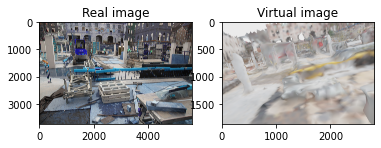

In [67]:
plt.subplot(1, 2, 1)
plt.title('Real image')
plt.imshow(node.resource)
plt.subplot(1, 2, 2)
plt.title('Virtual image')
plt.imshow(im)
plt.show()

**NOTE**: there is a rotational error on the virtual image, perhaps due to a misalignemtn of the mesh or the image within the structure-from-motion pipeline.

In [69]:
virtualNode=ImageNode(subject=node.subject.toPython() + '-virtual',
                isDerivedFromGeometry=meshNode.subject,
                isDerivedFromImage=node.subject,
                analysisTimestamp=meshNode.timestamp)
virtualNode.to_graph()
print(virtualNode.graph.serialize())

@prefix omg: <https://w3id.org/omg#> .
@prefix v4d: <https://w3id.org/v4d/core#> .

<file:///IMG_7255-virtual> a v4d:ImageNode ;
    omg:isDerivedFromGeometry "file:///week22" ;
    v4d:analysisTimestamp "2022-08-02T08:25:01" ;
    v4d:isDerivedFromImage "file:///IMG_7255" .


